# ENTRENAMIENTO DE RED NEURONAL PARA CLASIFICACIÓN DE AGUA POTABLE

## DATASET : [KAGGLE](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import kagglehub
from kagglehub import KaggleDatasetAdapter
from pathlib import Path


# CARGAMOS EL DATASET

In [16]:
# Descarga el dataset y convierte la ruta a tipo Path
dataset_path = Path(kagglehub.dataset_download("adityakadiwal/water-potability"))

# Usamos operador / entre objetos Path para formar la ruta completa
csv_file_path = dataset_path / "water_potability.csv"

# Leemos el archivo con pandas
df = pd.read_csv(csv_file_path)

# Mostramos las primeras filas
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [17]:
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [18]:
df.shape

(3276, 10)

In [19]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# IMPUTACIÓN DE DATOS FALTANTES

In [20]:
for col in ['ph','Sulfate','Trihalomethanes']:
  df[col].fillna(df[col].median(),inplace=True)

df.isnull().sum()

<ipython-input-20-6e163149fcd5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# CREAMOS VARIABLE DEPENDIENTE E INDEPENDIENTE

In [21]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9].values

# ESCALAMIENTO DE DATOS

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# DIVIDIMOS DATASET EN ENTRENAMIENTO Y PRUEBA

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# CREAMOS RED NEURONAL CON TENSORFLOW Y KERAS

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
red = Sequential()
entrada = Dense(units=5,activation='relu')
oculta1 = Dense(units=5,activation='relu')
salida = Dense(units=1,activation='sigmoid')

red.add(entrada)
red.add(oculta1)
red.add(salida)

red

<Sequential name=sequential, built=False>

# CONFIGURAMOS LA RED CON UN OPTIMIZADOR

In [26]:
red.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# ENTRENAMOS LA RED NEURONAL

In [27]:
model1 = red.fit(X_train,y_train,batch_size=30,epochs=100)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5730 - loss: 0.6808
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 0.6416
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6197
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 0.6170
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.6157
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.6058
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - loss: 0.6054
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.5981
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.5983
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6788 - loss: 0.6114
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5912
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

# VALIDAMOS EL MODELO

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

y_pred = red.predict(X_test)
y_pred = np.round(y_pred)

score = accuracy_score(y_test,y_pred)
print(f'el accuracy es {score}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
el accuracy es 0.6737804878048781


# MATRIZ DE CONFUSIÓN

<Figure size 1100x1100 with 0 Axes>

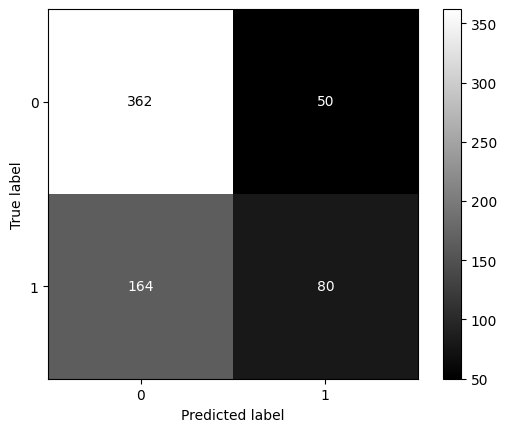

In [29]:
matrix = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(11,11))
cm = matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='gray')
plt.show()